In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [112]:
universe_df = pd.read_csv(r"C:\Users\WeeKe\Desktop\Stock_Universe.csv")


In [113]:
universe_df

,gvkey,iid,datadate,tic,trt1m,naics,sic
0,1000,01,30/09/1970,AE.2,NaN,NaN,3089.0
1,1000,01,31/10/1970,AE.2,6.3830,NaN,3089.0
2,1000,01,30/11/1970,AE.2,-28.0000,NaN,3089.0
3,1000,01,31/12/1970,AE.2,11.1111,NaN,3089.0
4,1000,01,31/01/1971,AE.2,-10.0000,NaN,3089.0
...,...,...,...,...,...,...,...
7560347,352257,01C,30/06/2022,HX.,-14.2857,212393.0,1400.0
7560348,352257,01C,31/07/2022,HX.,-8.3333,212393.0,1400.0
7560349,352257,01C,31/08/2022,HX.,38.1818,212393.0,1400.0
7560350,353444,90,31/07/2022,HLN,NaN,325412.0,2834.0


In [114]:
universe_df.drop(columns = ["gvkey", "iid"])

,datadate,tic,trt1m,naics,sic
0,30/09/1970,AE.2,NaN,NaN,3089.0
1,31/10/1970,AE.2,6.3830,NaN,3089.0
2,30/11/1970,AE.2,-28.0000,NaN,3089.0
3,31/12/1970,AE.2,11.1111,NaN,3089.0
4,31/01/1971,AE.2,-10.0000,NaN,3089.0
...,...,...,...,...,...
7560347,30/06/2022,HX.,-14.2857,212393.0,1400.0
7560348,31/07/2022,HX.,-8.3333,212393.0,1400.0
7560349,31/08/2022,HX.,38.1818,212393.0,1400.0
7560350,31/07/2022,HLN,NaN,325412.0,2834.0


In [115]:
universe_df["tic"].unique()

array(['AE.2', 'AMFD.', 'AAIC.1', ..., 'HXLTF', 'HX.', 'HLN'],
      dtype=object)

In [116]:
len(universe_df["tic"].unique())

56123

# Filtering Universe of Stocks

## Sin Stocks

In [50]:
sic_beverages = [2080, 2082, 2083, 2084, 2085] 
sic_smoke = [x for x in range(2100, 2200)]

naics_sin = [7132, 713210, 71329, 713290, 72112, 721120]
sic_sin = sic_beverages + sic_smoke

In [51]:
len(universe_df[universe_df["sic"].isin(sic_sin)].tic.unique())

198

In [52]:
len(universe_df[universe_df["naics"].isin(naics_sin)].tic.unique())

154

In [53]:
sin_stocks = universe_df[((universe_df["sic"].isin(sic_sin)) | (universe_df["naics"].isin(naics_sin)))]

In [54]:
sin_stocks

,gvkey,iid,datadate,tic,trt1m,naics,sic
65809,1320,01,30/09/1972,ALV.3,NaN,NaN,2080.0
65810,1320,01,31/10/1972,ALV.3,9.0498,NaN,2080.0
65811,1320,01,30/11/1972,ALV.3,-3.7344,NaN,2080.0
65812,1320,01,31/12/1972,ALV.3,7.3276,NaN,2080.0
65813,1320,01,31/01/1973,ALV.3,18.0723,NaN,2080.0
...,...,...,...,...,...,...,...
7560199,350910,01C,30/04/2022,RVLY.,-6.7073,713290.0,7990.0
7560200,350910,01C,31/05/2022,RVLY.,-5.8824,713290.0,7990.0
7560201,350910,01C,30/06/2022,RVLY.,-38.1944,713290.0,7990.0
7560202,350910,01C,31/07/2022,RVLY.,-3.3708,713290.0,7990.0


In [55]:
len(sin_stocks["tic"].unique())

352

In [56]:
# Changing to datetime format
sin_stocks["datadate"] = pd.to_datetime(sin_stocks["datadate"])
sin_stocks.head()

c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gvkey,iid,datadate,tic,trt1m,naics,sic
65809,1320,01,1972-09-30,ALV.3,NaN,NaN,2080.0
65810,1320,01,1972-10-31,ALV.3,9.0498,NaN,2080.0
65811,1320,01,1972-11-30,ALV.3,-3.7344,NaN,2080.0
65812,1320,01,1972-12-31,ALV.3,7.3276,NaN,2080.0
65813,1320,01,1973-01-31,ALV.3,18.0723,NaN,2080.0


In [57]:
# Transforming returns to decimal values
sin_stocks["monthly_decimal_returns"] = sin_stocks["trt1m"] / 100
sin_stocks

c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gvkey,iid,datadate,tic,trt1m,naics,sic,monthly_decimal_returns
65809,1320,01,1972-09-30,ALV.3,NaN,NaN,2080.0,NaN
65810,1320,01,1972-10-31,ALV.3,9.0498,NaN,2080.0,0.090498
65811,1320,01,1972-11-30,ALV.3,-3.7344,NaN,2080.0,-0.037344
65812,1320,01,1972-12-31,ALV.3,7.3276,NaN,2080.0,0.073276
65813,1320,01,1973-01-31,ALV.3,18.0723,NaN,2080.0,0.180723
...,...,...,...,...,...,...,...,...
7560199,350910,01C,2022-04-30,RVLY.,-6.7073,713290.0,7990.0,-0.067073
7560200,350910,01C,2022-05-31,RVLY.,-5.8824,713290.0,7990.0,-0.058824
7560201,350910,01C,2022-06-30,RVLY.,-38.1944,713290.0,7990.0,-0.381944
7560202,350910,01C,2022-07-31,RVLY.,-3.3708,713290.0,7990.0,-0.033708


# Removing Observations with Returns >= 350%

In [59]:
sin_stocks = sin_stocks[sin_stocks["monthly_decimal_returns"]< 0.350]
sin_stocks.shape

(55679, 8)

In [ ]:
sin_pivot = sin_stocks.pivot(index = "datadate", columns = "tic", values = "monthly_decimal_returns")
sin_pivot

tic,2788A,3157B,3ALES.,3BACDA,3BBTCE,3BETM,3BOBR,3BRAUE,3CGMI,3CGMI.,...,WBEV,WBR.,WDKA,WFSN.1,WIKD,WIMHY,WNWN,WVVI,WYNMY,WYNN
datadate,,,,,,,,,,,,,,,,,,,,,
1962-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-03-31,-0.048544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-04-30,-0.071429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-05-31,-0.057693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-06-30,-0.065088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.072555,-0.070981,NaN,NaN,NaN,NaN,NaN,0.025392,-0.148022,-0.116127
2022-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.268707,-0.056090,NaN,NaN,NaN,NaN,NaN,-0.328664,-0.065172,-0.062145
2022-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.279070,-0.016787,NaN,NaN,NaN,NaN,NaN,0.006421,0.163412,-0.137973


# Stimulant Stocks

In [117]:
sic_stim = [2095]
naics_stim = [311920]
stim_stocks = universe_df[((universe_df["sic"].isin(sic_stim)) | (universe_df["naics"].isin(naics_stim)))]

In [118]:
stim_stocks

,gvkey,iid,datadate,tic,trt1m,naics,sic
418941,3013,01,31/01/1962,CHF.,NaN,311920.0,2090.0
418942,3013,01,28/02/1962,CHF.,NaN,311920.0,2090.0
418943,3013,01,31/03/1962,CHF.,NaN,311920.0,2090.0
418944,3013,01,30/04/1962,CHF.,NaN,311920.0,2090.0
418945,3013,01,31/05/1962,CHF.,NaN,311920.0,2090.0
...,...,...,...,...,...,...,...
7380788,189655,01,31/12/2019,BKCT,NaN,311920.0,2090.0
7380789,189655,01,29/02/2020,BKCT,900.0,311920.0,2090.0
7380790,189655,01,30/04/2020,BKCT,0.0,311920.0,2090.0
7380791,189655,01,31/05/2020,BKCT,100.0,311920.0,2090.0


In [119]:
len(stim_stocks["tic"].unique())

25

In [120]:
# Changing to datetime format
stim_stocks["datadate"] = pd.to_datetime(stim_stocks["datadate"])
stim_stocks.head()

c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gvkey,iid,datadate,tic,trt1m,naics,sic
418941,3013,01,1962-01-31,CHF.,NaN,311920.0,2090.0
418942,3013,01,1962-02-28,CHF.,NaN,311920.0,2090.0
418943,3013,01,1962-03-31,CHF.,NaN,311920.0,2090.0
418944,3013,01,1962-04-30,CHF.,NaN,311920.0,2090.0
418945,3013,01,1962-05-31,CHF.,NaN,311920.0,2090.0


In [121]:
stim_stocks["monthly_decimal_returns"] = stim_stocks["trt1m"] / 100
stim_stocks

c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,gvkey,iid,datadate,tic,trt1m,naics,sic,monthly_decimal_returns
418941,3013,01,1962-01-31,CHF.,NaN,311920.0,2090.0,NaN
418942,3013,01,1962-02-28,CHF.,NaN,311920.0,2090.0,NaN
418943,3013,01,1962-03-31,CHF.,NaN,311920.0,2090.0,NaN
418944,3013,01,1962-04-30,CHF.,NaN,311920.0,2090.0,NaN
418945,3013,01,1962-05-31,CHF.,NaN,311920.0,2090.0,NaN
...,...,...,...,...,...,...,...,...
7380788,189655,01,2019-12-31,BKCT,NaN,311920.0,2090.0,NaN
7380789,189655,01,2020-02-29,BKCT,900.0,311920.0,2090.0,9.0
7380790,189655,01,2020-04-30,BKCT,0.0,311920.0,2090.0,0.0
7380791,189655,01,2020-05-31,BKCT,100.0,311920.0,2090.0,1.0


In [122]:
stim_stocks = stim_stocks[stim_stocks["monthly_decimal_returns"]< 0.350]
stim_stocks.shape
stim_stocks.to_csv("stim_stocks.csv")

In [123]:
stim_pivot = stim_stocks.pivot(index = "datadate", columns = "tic", values = "monthly_decimal_returns")
stim_pivot.to_csv("stim_pivot.csv")

# Checking distribution of both sin and stimulant stocks

In [99]:
sin_stim_stocks = pd.concat([sin_stocks,stim_stocks], axis = 0)
sin_stim_stocks

,gvkey,iid,datadate,tic,trt1m,naics,sic,monthly_decimal_returns
65810,1320,01,1972-09-30 00:00:00,ALV.3,NaN,NaN,2080.0,NaN
65811,1320,01,1972-10-31 00:00:00,ALV.3,9.0498,NaN,2080.0,0.090498
65812,1320,01,1972-11-30 00:00:00,ALV.3,-3.7344,NaN,2080.0,-0.037344
65813,1320,01,1972-12-31 00:00:00,ALV.3,7.3276,NaN,2080.0,0.073276
65814,1320,01,1973-01-31 00:00:00,ALV.3,18.0723,NaN,2080.0,0.180723
...,...,...,...,...,...,...,...,...
7381349,189655,01,31/12/2019,BKCT,NaN,311920.0,2090.0,NaN
7381350,189655,01,29/02/2020,BKCT,900.0000,311920.0,2090.0,NaN
7381351,189655,01,30/04/2020,BKCT,0.0000,311920.0,2090.0,NaN
7381352,189655,01,31/05/2020,BKCT,100.0000,311920.0,2090.0,NaN


## Histograms
Bins:
1. Negatives: -100--90, -90-80 increments of 10%
2. Positives: 0-10, 10-20, ..., 90-100, 100-200, 200-300, 300-400, ... 1000, 1000-infty 

In [105]:
sin_stim_stocks

,gvkey,iid,datadate,tic,trt1m,naics,sic,monthly_decimal_returns
65810,1320,01,1972-09-30 00:00:00,ALV.3,NaN,NaN,2080.0,NaN
65811,1320,01,1972-10-31 00:00:00,ALV.3,9.0498,NaN,2080.0,0.090498
65812,1320,01,1972-11-30 00:00:00,ALV.3,-3.7344,NaN,2080.0,-0.037344
65813,1320,01,1972-12-31 00:00:00,ALV.3,7.3276,NaN,2080.0,0.073276
65814,1320,01,1973-01-31 00:00:00,ALV.3,18.0723,NaN,2080.0,0.180723
...,...,...,...,...,...,...,...,...
7381349,189655,01,31/12/2019,BKCT,NaN,311920.0,2090.0,NaN
7381350,189655,01,29/02/2020,BKCT,900.0000,311920.0,2090.0,NaN
7381351,189655,01,30/04/2020,BKCT,0.0000,311920.0,2090.0,NaN
7381352,189655,01,31/05/2020,BKCT,100.0000,311920.0,2090.0,NaN


(array([1.1800e+02, 1.2700e+02, 1.7600e+02, 2.2200e+02, 3.3800e+02,
        6.7900e+02, 1.0800e+03, 2.0800e+03, 5.6120e+03, 1.7031e+04,
        2.3352e+04, 5.5470e+03, 2.0410e+03, 8.9700e+02, 4.2800e+02,
        3.5800e+02, 2.4000e+02, 1.3200e+02, 1.3400e+02, 6.8000e+01,
        4.9200e+02, 1.4300e+02, 4.7000e+01, 4.1000e+01, 1.8000e+01,
        1.9000e+01, 9.0000e+00, 6.0000e+00, 4.5000e+01]),
 array([-100,  -90,  -80,  -70,  -60,  -50,  -40,  -30,  -20,  -10,    0,
          10,   20,   30,   40,   50,   60,   70,   80,   90,  100,  200,
         300,  400,  500,  600,  700,  800,  900, 1000]),
 <BarContainer object of 29 artists>)

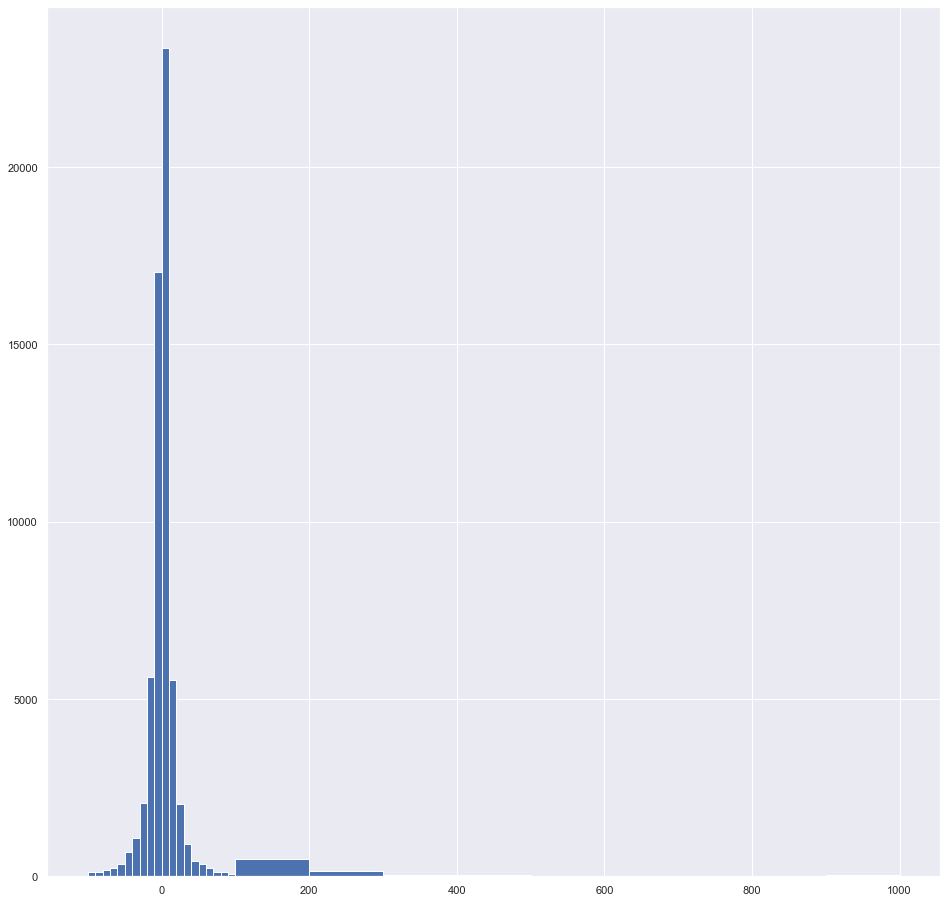

In [96]:
plt.hist(sin_stim_stocks["trt1m"], bins = [x for x in range(-100,100,10)] + [x for x in range(100, 1100, 100)])

In [83]:
sin_stim_stocks.describe()

,gvkey,trt1m,naics,sic,monthly_decimal_returns
count,64222.000000,6.160300e+04,61169.000000,64222.000000,5.812000e+04
mean,56217.281944,2.640941e+03,443231.891154,4386.667341,2.773615e+01
std,70940.339442,6.366215e+05,235073.752417,2877.268578,6.554065e+03
min,1320.000000,-9.999560e+01,312.000000,2080.000000,-9.999560e-01
25%,6124.000000,-5.984200e+00,312120.000000,2082.000000,-5.946275e-02
50%,23019.000000,0.000000e+00,312140.000000,2090.000000,0.000000e+00
75%,100472.000000,6.301650e+00,713210.000000,7990.000000,6.322025e-02
max,350910.000000,1.580000e+08,721120.000000,9995.000000,1.580000e+06


In [84]:
above_1000 = sin_stim_stocks[sin_stim_stocks["trt1m"] >= 1000]
# plt.hist(above_1000["trt1m"], bins = range(int(above_1000["trt1m"].min()), int(above_1000["trt1m"].max()), 1000))
above_1000.describe()["trt1m"].to_csv("above_1k_summary.csv")

([<matplotlib.axis.XTick at 0x2aa57192d48>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

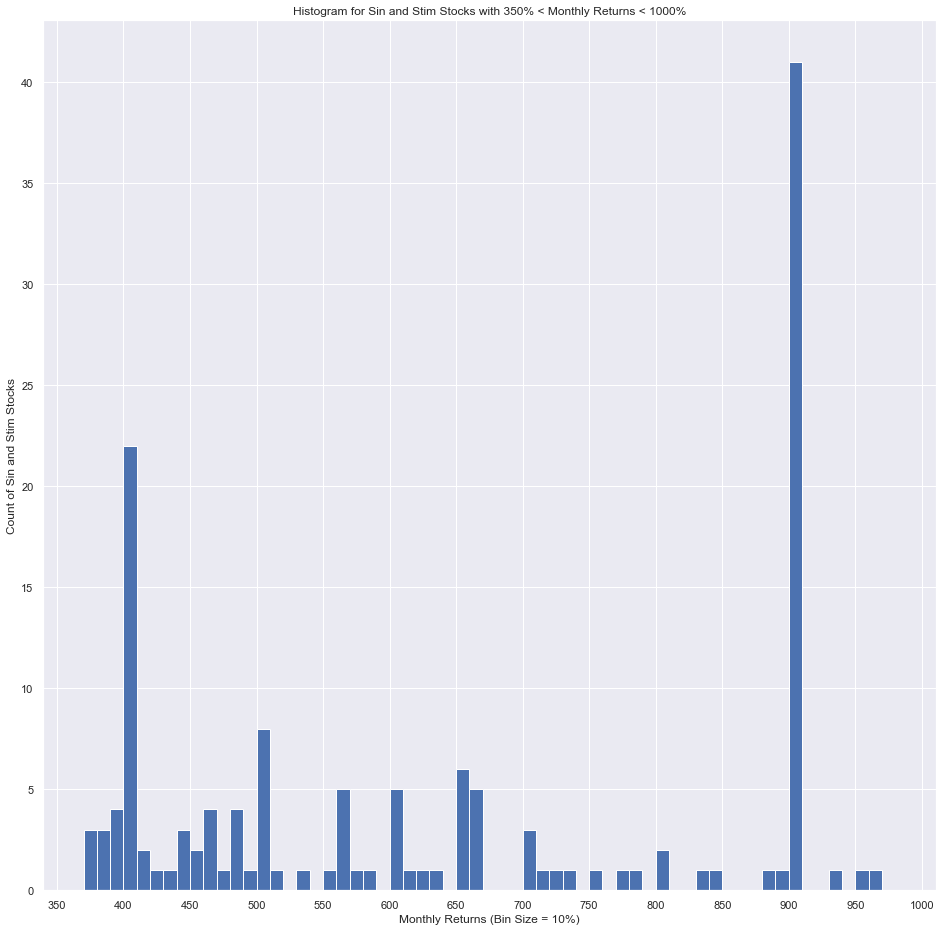

In [129]:
range_350 = sin_stim_stocks[(sin_stim_stocks["trt1m"] > 350) & (sin_stim_stocks["trt1m"] < 1000)]
plt.hist(range_350["trt1m"], bins = range(int(range_350["trt1m"].min()), int(range_350["trt1m"].max()), 10))
plt.title("Histogram for Sin and Stim Stocks with 350% < Monthly Returns < 1000%")
plt.xlabel("Monthly Returns (Bin Size = 10%)")
plt.ylabel("Count of Sin and Stim Stocks")
plt.xticks([x for x in range(350, 1050,50)])

([<matplotlib.axis.XTick at 0x2aa56d61688>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

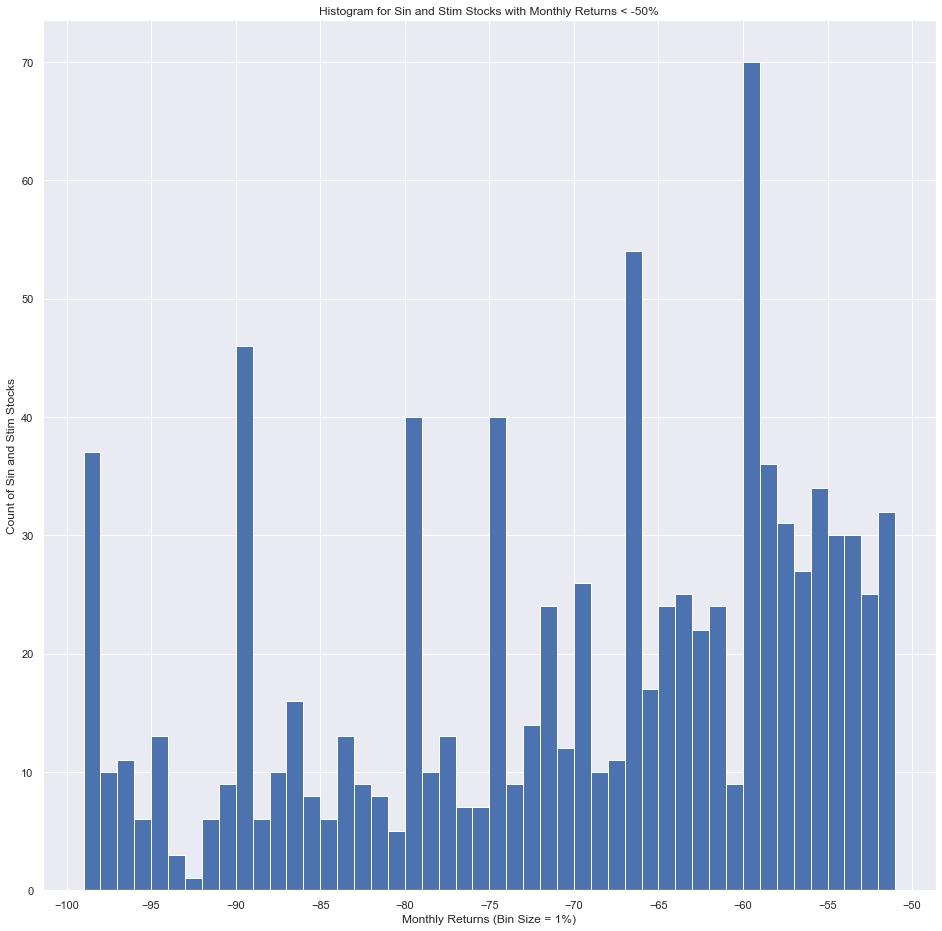

In [130]:
below_neg50 = sin_stim_stocks[sin_stim_stocks["trt1m"] <= -50]
plt.hist(below_neg50["trt1m"], bins = range(int(below_neg50["trt1m"].min()), int(below_neg50["trt1m"].max()), 1))
plt.title("Histogram for Sin and Stim Stocks with Monthly Returns < -50%")
plt.xlabel("Monthly Returns (Bin Size = 1%)")
plt.ylabel("Count of Sin and Stim Stocks")
plt.xticks([x for x in range(-100, -45, 5)])

([<matplotlib.axis.XTick at 0x2aa55195248>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

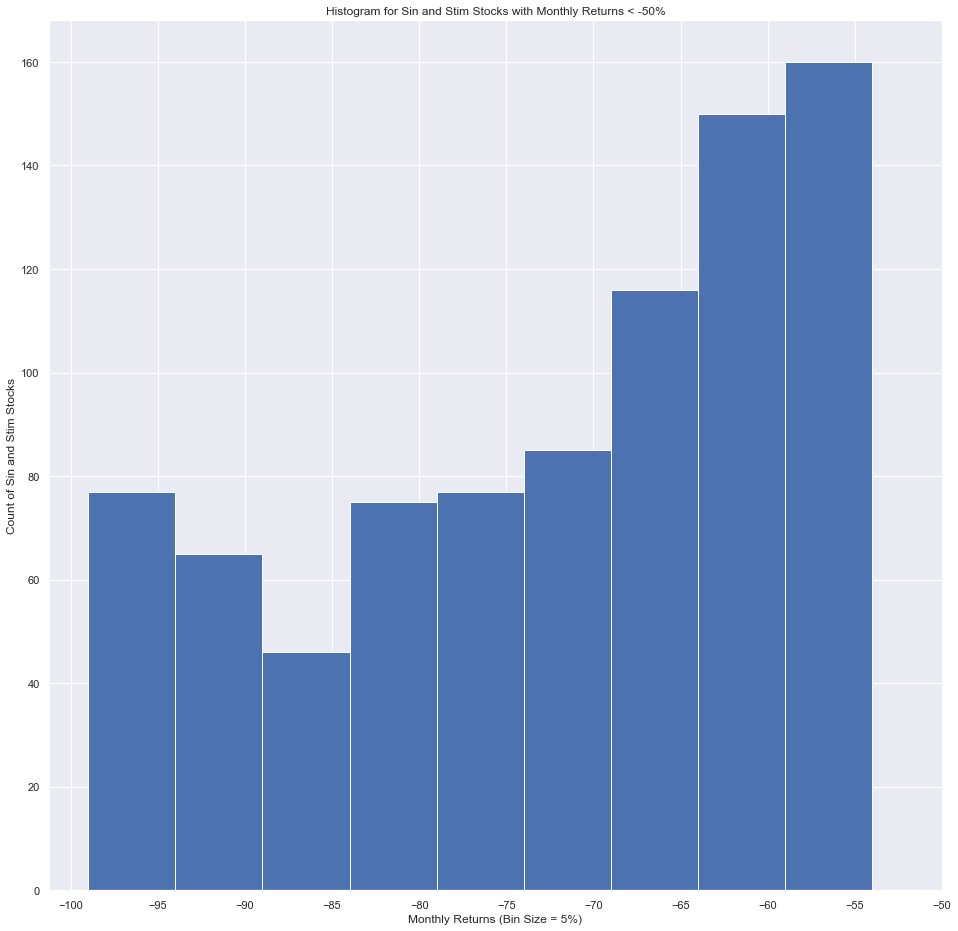

In [105]:
plt.hist(below_neg50["trt1m"], bins = range(int(below_neg50["trt1m"].min()), int(below_neg50["trt1m"].max()), 5))
plt.title("Histogram for Sin and Stim Stocks with Monthly Returns < -50%")
plt.xlabel("Monthly Returns (Bin Size = 5%)")
plt.ylabel("Count of Sin and Stim Stocks")
plt.xticks([x for x in range(-100, -45, 5)])

Text(0, 0.5, 'Count of Sin and Stim Stocks')

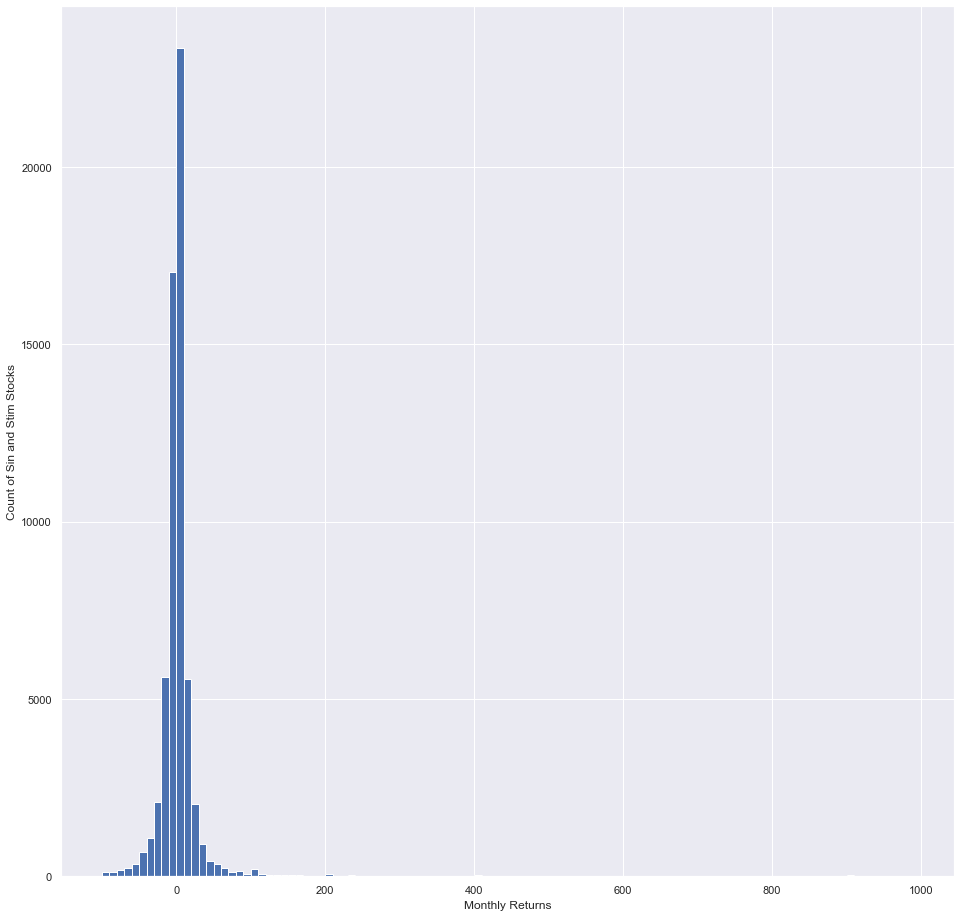

In [131]:
fig = plt.hist(sin_stim_stocks["trt1m"], bins = [x for x in range(-100,1000,10)])
plt.xlabel("Monthly Returns")
plt.ylabel("Count of Sin and Stim Stocks")

Text(0, 0.5, 'Count of Sin and Stim Stocks')

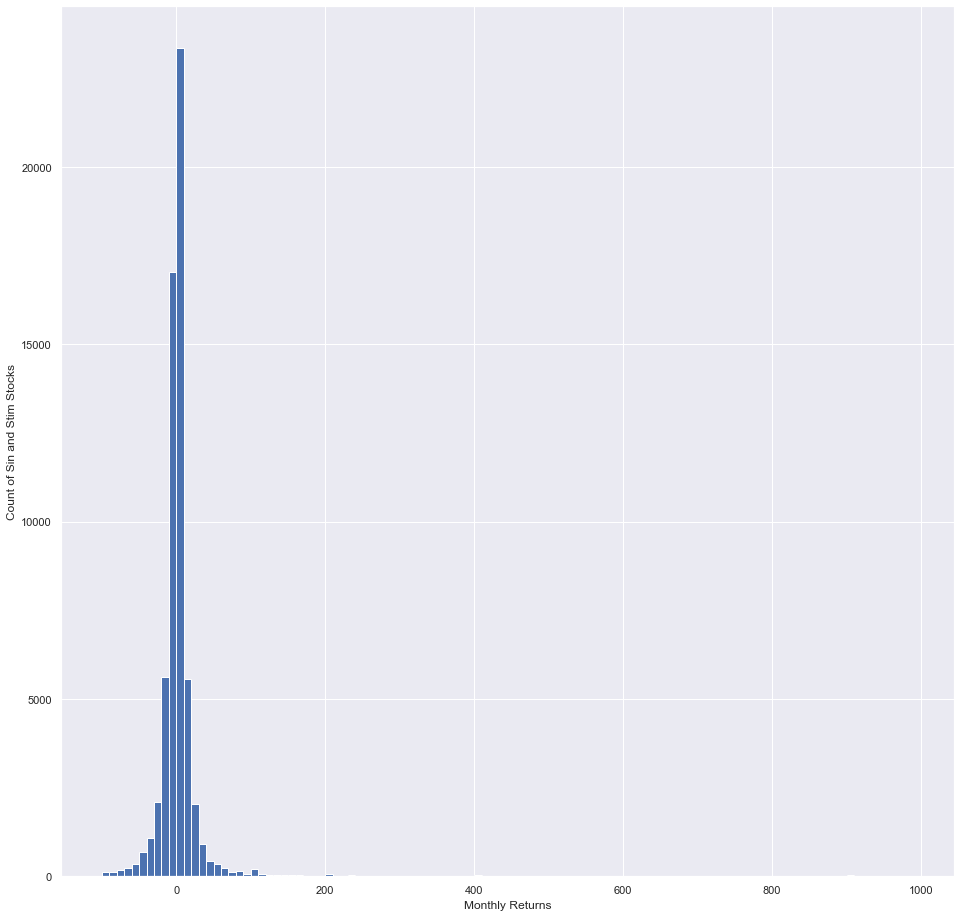

In [92]:
fig0 = plt.hist(sin_stim_stocks["trt1m"], bins = [x for x in range(-100,1000,10)])
plt.xlabel("Monthly Returns")
plt.ylabel("Count of Sin and Stim Stocks")